### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
from torchvision import datasets, transforms, models  # datsets  , transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

In [3]:
import os

def create_plant_dictionary(base_directory):
    """
    Create a dictionary mapping medicinal plant labels to their folder paths.

    Parameters:
        base_directory (str): The path to the main directory containing medicinal plant folders.

    Returns:
        dict: A dictionary where keys are plant labels and values are folder paths.
    """
    plant_dictionary = {}
    for root, dirs, files in os.walk(base_directory):
        for dir_name in dirs:
            plant_label = dir_name
            folder_path = os.path.join(root, dir_name)
            plant_dictionary[plant_label] = folder_path
    return plant_dictionary

# Replace 'your_base_directory' with the path to your main directory containing the medicinal plant folders.
base_directory = 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database'

# Call the function to create the dictionary.
plant_dict = create_plant_dictionary(base_directory)

# Now, 'plant_dict' contains the mapping of labels to folder paths.
# You can access folder paths using labels as keys in the dictionary.


### Import Dataset

<b> Dataset Link (Plant Vliiage Dataset ):</b><br> <a href='https://data.mendeley.com/datasets/tywbtsjrjv/1'> https://data.mendeley.com/datasets/tywbtsjrjv/1 </a> 

In [4]:
transform2 = transforms.Compose([
    transforms.Resize((299, 299)),  
    transforms.ToTensor(),          
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],      
        std=[0.5, 0.5, 0.5]         
    )
])

In [5]:
#dataset = datasets.ImageFolder("C:\Users\anirb\SMART INDIA HACKATHON\MepcoTropicLeaf-V1\Database", transform=transform2)
dataset=plant_dict

In [6]:
dataset

{'Asthma Plant.zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database\\Asthma Plant.zip',
 'Avaram.zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database\\Avaram.zip',
 'Balloon vine.zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database\\Balloon vine.zip',
 'Bellyache bush (Green).zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database\\Bellyache bush (Green).zip',
 'Benghal dayflower.zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database\\Benghal dayflower.zip',
 'Big Caltrops.zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database\\Big Caltrops.zip',
 'Black-Honey Shrub.zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database\\Black-Honey Shrub.zip',
 'Bristly Wild Grape.zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\MepcoTropicLeaf-V1\\Database\\Bristly Wild Grape.zip',
 'Butterfly Pea.zip': 'C:\\Users\\anirb\\SMART INDIA HACKATHON\\

In [7]:
indices = list(range(len(dataset)))

In [8]:
len(dataset)

50

In [9]:
split = int(np.floor(0.70 * len(dataset)))  # train_size

In [10]:
validation = int(np.floor(0.60 * split))  # validation

In [11]:
print(0, validation, split, len(dataset))

0 21 35 50


In [12]:
print(f"length of train size :{validation}")
print(f"length of validation size :{split - validation}")
print(f"length of test size :{len(dataset)-validation}")

length of train size :21
length of validation size :14
length of test size :29


In [13]:
np.random.shuffle(indices)

### Split into Train and Test

In [14]:
train_indices, validation_indices, test_indices = (
    indices[:validation],
    indices[validation:split],
    indices[split:],
)

In [15]:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

In [16]:
class_to_idx = {label: idx for idx, label in enumerate(plant_dict.keys())}

plant_dict['class_to_idx'] = class_to_idx

targets_size = len(dataset.class_to_idx)
print(targets_size)

AttributeError: 'dict' object has no attribute 'class_to_idx'

In [82]:
num_classes_list = list(dataset.class_to_idx.values())
print(num_classes_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### Model

<b>Convolution Aithmetic Equation : </b>(W - F + 2P) / S + 1 <br>
W = Input Size<br>
F = Filter Size<br>
P = Padding Size<br>
S = Stride <br>

### Transfer Learning

In [35]:
model = models.vgg16(pretrained=True)

In [34]:
model2 = models.inception_v3(pretrained=True)

In [39]:
for params in model.parameters():
   params.requires_grad = False

In [54]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [40]:
n_features = model.classifier[0].in_features
n_features

25088

In [75]:
model.classifier = nn.Sequential(
     nn.Linear(n_features, 512),
     nn.ReLU(),
     nn.Dropout(0.4),
     nn.Linear(512, targets_size),
 )

### Original Modeling

In [76]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [77]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [44]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [78]:
from torchsummary import summary
 
summary(model, (3, 299, 299))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 299, 299]           1,792
              ReLU-2         [-1, 64, 299, 299]               0
            Conv2d-3         [-1, 64, 299, 299]          36,928
              ReLU-4         [-1, 64, 299, 299]               0
         MaxPool2d-5         [-1, 64, 149, 149]               0
            Conv2d-6        [-1, 128, 149, 149]          73,856
              ReLU-7        [-1, 128, 149, 149]               0
            Conv2d-8        [-1, 128, 149, 149]         147,584
              ReLU-9        [-1, 128, 149, 149]               0
        MaxPool2d-10          [-1, 128, 74, 74]               0
           Conv2d-11          [-1, 256, 74, 74]         295,168
             ReLU-12          [-1, 256, 74, 74]               0
           Conv2d-13          [-1, 256, 74, 74]         590,080
             ReLU-14          [-1, 256,

In [79]:
criterion = nn.CrossEntropyLoss()  # this include softmax + cross entropy loss
optimizer = torch.optim.Adam(model.parameters())

### Batch Gradient Descent

In [64]:
def batch_gd(model, criterion, train_loader, test_laoder, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for e in range(epochs):

        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
           
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            train_loss.append(loss.item())  # torch to numpy world
            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_loss)

        validation_loss = []

        for inputs, targets in validation_loader:
            
            inputs, targets = inputs.to(device), targets.to(device)

            output = model(inputs)

            loss = criterion(output, targets)

            validation_loss.append(loss.item())  # torch to numpy world

        validation_loss = np.mean(validation_loss)

        train_losses[e] = train_loss

        dt = datetime.now() - t0

        print(f"Epoch : {e+1}/{epochs} Train_loss:{train_loss:.3f} Duration:{dt}")

    return train_losses

In [80]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler
)
test_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler
)
validation_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=validation_sampler
)

In [81]:
train_losses = batch_gd(model, criterion, train_loader, validation_loader, 10)

Epoch : 1/10 Train_loss:2.050 Duration:0:01:32.407554
Epoch : 2/10 Train_loss:0.331 Duration:0:01:31.999672
Epoch : 3/10 Train_loss:0.112 Duration:0:01:32.022751
Epoch : 4/10 Train_loss:0.053 Duration:0:01:32.547045
Epoch : 5/10 Train_loss:0.044 Duration:0:01:32.485692
Epoch : 6/10 Train_loss:0.044 Duration:0:01:33.840270
Epoch : 7/10 Train_loss:0.025 Duration:0:01:33.180205
Epoch : 8/10 Train_loss:0.018 Duration:0:01:32.584225
Epoch : 9/10 Train_loss:0.011 Duration:0:01:32.647730
Epoch : 10/10 Train_loss:0.006 Duration:0:01:32.418004


### Save the Model

### Load Model

In [ ]:
targets_size = 50
model = CNN(targets_size)
model.load_state_dict(torch.load("plant.pt"))
model.eval()

In [ ]:
# %matplotlib notebook

### Plot the loss

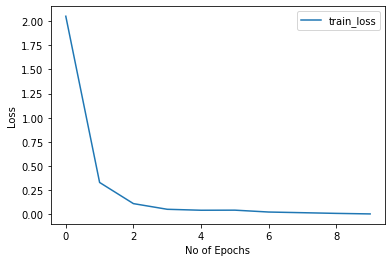

In [88]:
plt.plot(train_losses , label = 'train_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy

In [84]:
def accuracy(loader):
    n_correct = 0
    n_total = 0
    model.cuda()
    for inputs, targets in loader:
        inputs, targets = inputs.cuda(), targets.cuda()

        outputs = model(inputs)
        #print(outputs)

        _, predictions = torch.max(outputs, 1)

        n_correct += (predictions == targets).sum().item()
        n_total += targets.shape[0]

    acc = n_correct / n_total
    return acc

In [86]:
train_acc = accuracy(train_loader)
test_acc = accuracy(test_loader)
validation_acc = accuracy(validation_loader)

In [87]:
print(
    f"Train Accuracy : {train_acc}\nTest Accuracy : {test_acc}\nValidation Accuracy : {validation_acc}"
)

Train Accuracy : 1.0
Test Accuracy : 0.9065255731922398
Validation Accuracy : 0.8884239888423989


In [99]:
torch.save(model, "PlantMed.pt")

In [101]:
model = models.vgg16(pretrained=True)

# Load the model weights from the saved file
model.load_state_dict(torch.load('PlantMed.pt', map_location=torch.device('cpu')))

# Set the model to evaluation mode
model.eval()

RuntimeError: Error(s) in loading state_dict for VGG:
	Missing key(s) in state_dict: "classifier.6.weight", "classifier.6.bias". 
	size mismatch for classifier.0.weight: copying a param with shape torch.Size([512, 25088]) from checkpoint, the shape in current model is torch.Size([4096, 25088]).
	size mismatch for classifier.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for classifier.3.weight: copying a param with shape torch.Size([50, 512]) from checkpoint, the shape in current model is torch.Size([4096, 4096]).
	size mismatch for classifier.3.bias: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([4096]).

In [90]:
from PIL import Image